
## London crime Analysis

### This data is collected from https://data.police.uk/data/ 

#### Data is stored in inputs folder and containing two folders Outcome & Street


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from IPython.display import Image
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.

import os
ls_Outcomes = os.listdir("./inputs/Outcome")
ls_Streets = os.listdir("./inputs/Street")
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

def GetDistance(lat1,lon1,lat2,lon2):
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return(distance)
# Any results you write to the current directory are saved as output.

In [2]:
print("outcome files",ls_Outcomes)
print("street files",ls_Streets)

outcome files ['2016-08-city-of-london-outcomes.csv', '2016-09-city-of-london-outcomes.csv', '2016-10-city-of-london-outcomes.csv', '2016-11-city-of-london-outcomes.csv', '2016-12-city-of-london-outcomes.csv', '2017-01-city-of-london-outcomes.csv', '2017-02-city-of-london-outcomes.csv', '2017-03-city-of-london-outcomes.csv', '2017-04-city-of-london-outcomes.csv', '2017-05-city-of-london-outcomes.csv', '2017-06-city-of-london-outcomes.csv', '2017-07-city-of-london-outcomes.csv', '2017-08-city-of-london-outcomes.csv', '2017-09-city-of-london-outcomes.csv', '2017-10-city-of-london-outcomes.csv', '2017-11-city-of-london-outcomes.csv', '2017-12-city-of-london-outcomes.csv', '2018-01-city-of-london-outcomes.csv', '2018-02-city-of-london-outcomes.csv', '2018-03-city-of-london-outcomes.csv', '2018-04-city-of-london-outcomes.csv', '2018-05-city-of-london-outcomes.csv', '2018-06-city-of-london-outcomes.csv', '2018-07-city-of-london-outcomes.csv', '2018-08-city-of-london-outcomes.csv', '2018-09-c

## Reading the data

In [3]:
# reading outcome data
C = 0
for name in ls_Outcomes[0:-1]:
    Name = os.path.abspath(os.path.join("./inputs/Outcome",name))
    #print(Name)
    if C == 0:
        data_outcome = pd.read_csv(Name)
        #print(data.columns)
        C=1
    else:
        df = pd.read_csv(Name)
        #print(df.columns)
        #data = data.append(df)
        data_outcome = pd.concat([data_outcome,df])

### Checking the unique values in dataset

In [4]:
# get some info of data set
data_outcome.nunique()

Crime ID        14890
Month              36
Reported by         1
Falls within        1
Longitude         536
Latitude          528
Location          359
LSOA code          58
LSOA name          58
Outcome type       22
dtype: int64

### Remove redundent columns "Falls within" &'Reported by'

In [5]:
data_outcome = data_outcome.drop(columns=["Falls within",'Reported by'])
data_outcome.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'LSOA code',
       'LSOA name', 'Outcome type'],
      dtype='object')

In [6]:
data_outcome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16850 entries, 0 to 648
Data columns (total 8 columns):
Crime ID        16850 non-null object
Month           16850 non-null object
Longitude       15839 non-null float64
Latitude        15839 non-null float64
Location        16850 non-null object
LSOA code       15839 non-null object
LSOA name       15839 non-null object
Outcome type    16850 non-null object
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


In [7]:
#Number of null values in all columns
data_outcome.isnull().sum()

Crime ID           0
Month              0
Longitude       1011
Latitude        1011
Location           0
LSOA code       1011
LSOA name       1011
Outcome type       0
dtype: int64

In [8]:
data_outcome.head(2)

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d041f0854a6f3dd25e7e468412e5d9f1a3aabdfcf18f55...,2016-08,-0.087118,51.513199,On or near Nightclub,E01032739,City of London 001F,Investigation complete; no suspect identified
1,4bbe0279f9132cacca5c87d7f93c1114620ece79f7997c...,2016-08,-0.109709,51.517909,On or near HIGH HOLBORN,E01032740,City of London 001G,Investigation complete; no suspect identified


### Reading street data

In [9]:
# reading street data
C = 0
for name in ls_Streets:
    Name = os.path.abspath(os.path.join("./inputs/Street",name))
    #print(Name)
    if C == 0:
        data_street = pd.read_csv(Name)
        #print(data.columns)
        C=1
    else:
        df = pd.read_csv(Name)
        #print(df.columns)
        #data = data.append(df)
        data_street = pd.concat([data_street,df])

In [10]:
# get some info of data set
data_street.nunique()

Crime ID                 19947
Month                       36
Reported by                  1
Falls within                 1
Longitude                  607
Latitude                   598
Location                   411
LSOA code                   87
LSOA name                   87
Crime type                  14
Last outcome category       25
Context                      0
dtype: int64

### Remove redundent columns "Falls within",'Reported by','Context'

In [11]:
data_street = data_street.drop(columns=["Falls within",'Reported by','Context'])
data_street.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'LSOA code',
       'LSOA name', 'Crime type', 'Last outcome category'],
      dtype='object')

In [12]:
data_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24406 entries, 0 to 865
Data columns (total 9 columns):
Crime ID                 20021 non-null object
Month                    24406 non-null object
Longitude                23005 non-null float64
Latitude                 23005 non-null float64
Location                 24406 non-null object
LSOA code                23005 non-null object
LSOA name                23005 non-null object
Crime type               24406 non-null object
Last outcome category    20021 non-null object
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


In [13]:
#Number of null values in all columns
data_street.isnull().sum()

Crime ID                 4385
Month                       0
Longitude                1401
Latitude                 1401
Location                    0
LSOA code                1401
LSOA name                1401
Crime type                  0
Last outcome category    4385
dtype: int64

In [14]:
data_street.head(2)

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2016-08,-0.107607,51.517839,On or near A40,E01000917,Camden 027C,Anti-social behaviour,NaN
1,NaN,2016-08,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour,NaN


## Combine both datasets

In [15]:
data = pd.merge(data_outcome,data_street[['Crime ID','Crime type', 'Last outcome category']], on="Crime ID")
data.head(2)

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
0,d041f0854a6f3dd25e7e468412e5d9f1a3aabdfcf18f55...,2016-08,-0.087118,51.513199,On or near Nightclub,E01032739,City of London 001F,Investigation complete; no suspect identified,Other theft,Investigation complete; no suspect identified
1,4bbe0279f9132cacca5c87d7f93c1114620ece79f7997c...,2016-08,-0.109709,51.517909,On or near HIGH HOLBORN,E01032740,City of London 001G,Investigation complete; no suspect identified,Bicycle theft,Investigation complete; no suspect identified


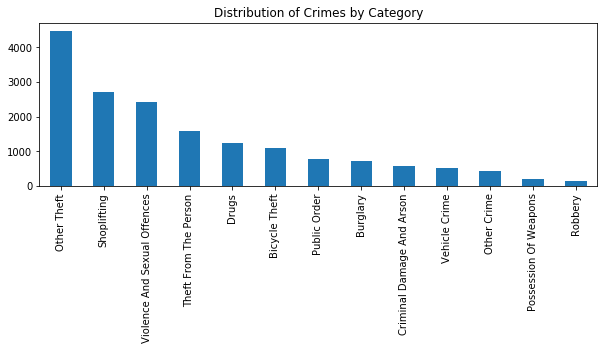

In [16]:
data["Crime type"].str.title().value_counts().plot(kind="bar",figsize=(10,3),title = "Distribution of Crimes by Category")
plt.show()

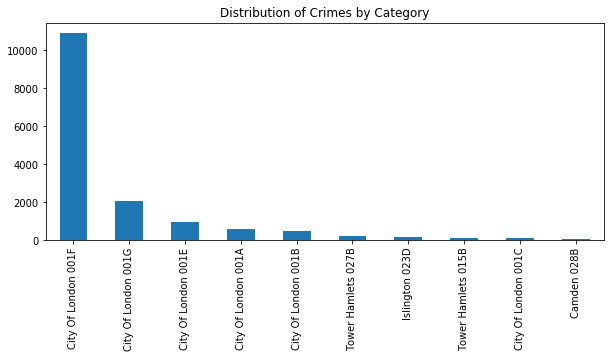

In [17]:
data["LSOA name"].str.title().value_counts()[0:10].plot(kind="bar",figsize=(10,4),title = "Distribution of Crimes by Category")
plt.show()

In [18]:
data["LSOA name"].unique()

array(['City of London 001F', 'City of London 001G',
       'City of London 001E', 'City of London 001A', nan,
       'Islington 023D', 'City of London 001B', 'Islington 022H',
       'Tower Hamlets 027B', 'Westminster 018B', 'City of London 001C',
       'Tower Hamlets 015B', 'Camden 028B', 'Southwark 003E',
       'Tower Hamlets 021F', 'Tower Hamlets 015E', 'Islington 023E',
       'Tower Hamlets 014D', 'Camden 027B', 'Tower Hamlets 025C',
       'Islington 022F', 'Tower Hamlets 021D', 'Rochford 003D',
       'Hackney 019A', 'Islington 022D', 'Wandsworth 005C',
       'Tower Hamlets 017A', 'Southwark 002C', 'Southwark 003H',
       'Hackney 027G', 'Tower Hamlets 013D', 'Tower Hamlets 026B',
       'Lewisham 026D', 'Tower Hamlets 030A', 'Southwark 002D',
       'Camden 028C', 'Camden 024C', 'Hackney 027H', 'Southwark 002B',
       'Hackney 027D', 'Tower Hamlets 025D', 'Haringey 023B',
       'Islington 021B', 'Tower Hamlets 011D', 'Newham 009C',
       'Southwark 006F', 'Westminster 0

## Lets focus on City Of London 001F

In [19]:
data = data[data["LSOA name"] == 'City of London 001F']

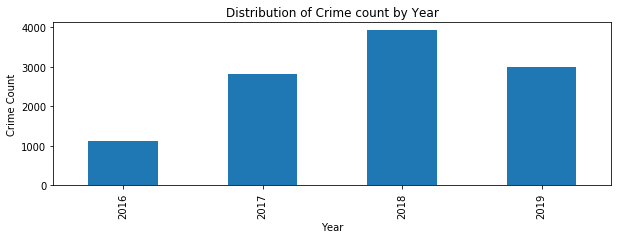

In [20]:
dates = pd.to_datetime(data["Month"]).dt.year
dates.value_counts().sort_index().plot(kind="bar",figsize=(10,3),title = "Distribution of Crime count by Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

### Lets group the data to create timeline

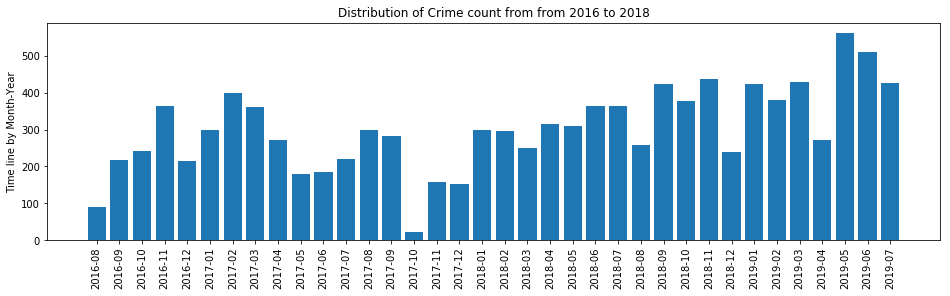

In [21]:
#df_GroupM = data.groupby(["Month","Crime type"]).count().reset_index()
fig = plt.figure(figsize=(16,4))
df_GroupM = data.groupby(["Month"]).count().reset_index()
df_GroupM = df_GroupM[["Month","Crime ID"]]
df_GroupM.columns = ["Month","Count"]

plt.bar(df_GroupM.Month,df_GroupM.Count)
plt.xticks(rotation=90)
plt.title("Distribution of Crime count from from 2016 to 2018")
plt.ylabel("Count of Crimes")
plt.ylabel("Time line by Month-Year")
plt.show()

### Observations 

1. In year 2016 we have data for only 5 months from August to december
2. In year 2019 also we have data for 7 months till july  
3. overalll the trend is increasing over years

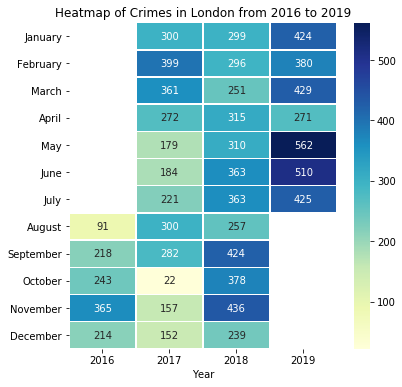

In [22]:
dates = pd.to_datetime(df_GroupM["Month"])
df_GroupM["Year"] = dates.dt.year.values
df_GroupM["Month"] = dates.dt.month.values
df_GroupM_matrix = df_GroupM.pivot("Month", "Year", "Count")
df_GroupM_matrix.index =dates.dt.month_name().values[5:17]
fig = plt.figure(figsize=(6,6))
r = sns.heatmap(df_GroupM_matrix,linewidths=.5,cmap="YlGnBu",fmt=".0f",annot=True)
r.set_title("Heatmap of Crimes in London from 2016 to 2019")
plt.show()

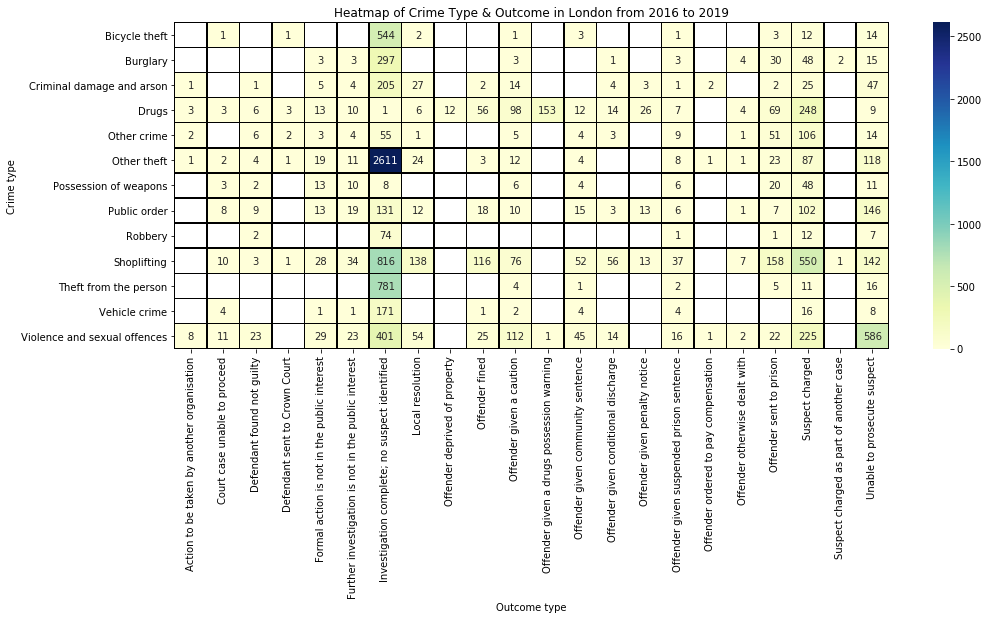

In [23]:
df_GroupCrimes = data.groupby(["Crime type","Outcome type"]).count().reset_index()
df_GroupCrimes = df_GroupCrimes.pivot("Crime type","Outcome type", "Month")

fig = plt.figure(figsize=(16,6))
r = sns.heatmap(df_GroupCrimes,linewidths=.5,cmap="YlGnBu",fmt=".0f",linecolor ="black",annot = True)
r.set_title("Heatmap of Crime Type & Outcome in London from 2016 to 2019")
plt.show()

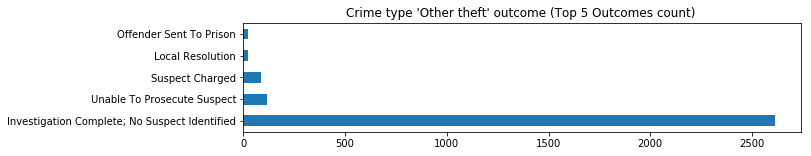

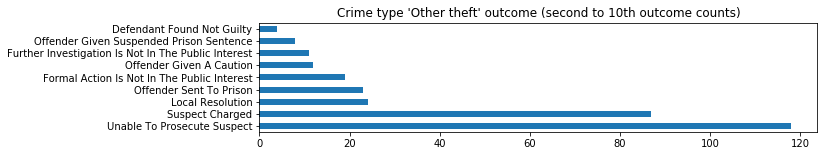

In [24]:
data["Outcome type"][data["Crime type"] =="Other theft"].str.title().value_counts()[0:5].plot(kind="barh",figsize=(10,2),
    title = "Crime type 'Other theft' outcome (Top 5 Outcomes count) ")
plt.show()
data["Outcome type"][data["Crime type"] =="Other theft"].str.title().value_counts()[1:10].plot(kind="barh",figsize=(10,2),
    title = "Crime type 'Other theft' outcome (second to 10th outcome counts)")
plt.show()

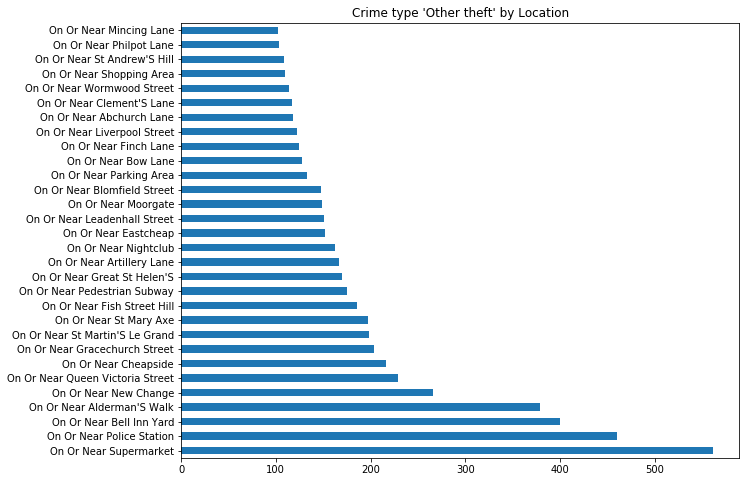

In [25]:
data["Location"].str.title().value_counts()[0:30].plot(kind="barh",figsize=(10,8),
    title = "Crime type 'Other theft' by Location")
plt.show()

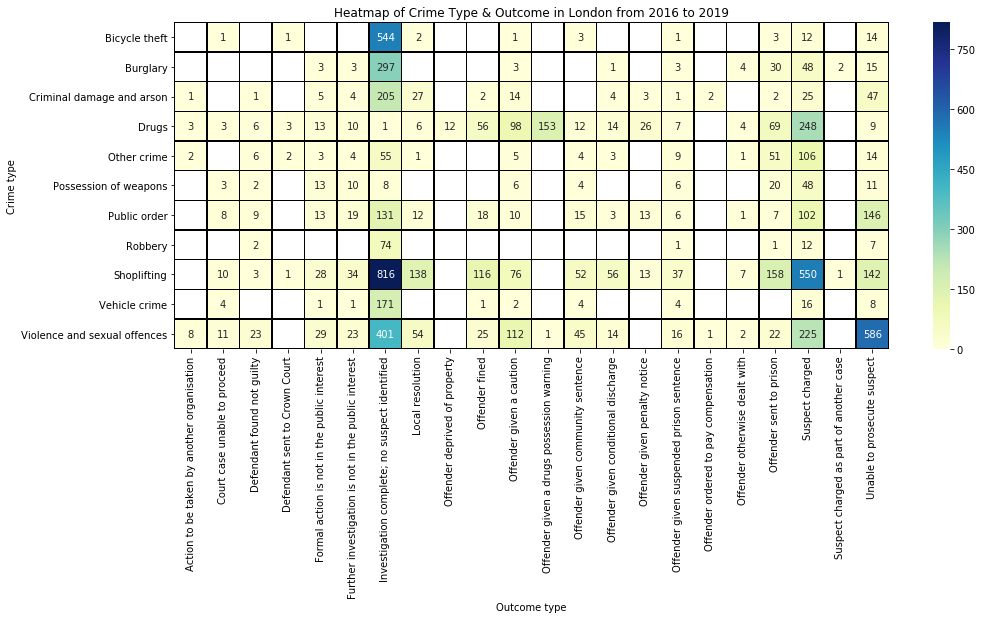

In [26]:
df_GroupCrimes = data.groupby(["Crime type","Outcome type"]).count().reset_index()
df_GroupCrimes = df_GroupCrimes[df_GroupCrimes["Crime type"] != "Other theft"]
df_GroupCrimes = df_GroupCrimes[df_GroupCrimes["Crime type"] != "Theft from the person"]
df_GroupCrimes = df_GroupCrimes.pivot("Crime type","Outcome type", "Month")

fig = plt.figure(figsize=(16,6))
r = sns.heatmap(df_GroupCrimes,linewidths=.5,cmap="YlGnBu",fmt=".0f",linecolor ="black",annot = True)
r.set_title("Heatmap of Crime Type & Outcome in London from 2016 to 2019")
plt.show()

# lets Plot the crime density on Map

![title](Picture1.png)

In [27]:
# Splitting Training and Testing variables
SUB = data[["Longitude","Latitude","Location"]]
SUB = SUB.drop_duplicates()
X = SUB[["Longitude","Latitude"]].values
Y = SUB["Location"].values
X_Train = X
X_Test = X

Y_Train = Y
Y_Test = Y

from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(X_Train)
distances, indices = nbrs.kneighbors(X_Test)

In [28]:
data["cnt"] = 1
df_GroupCrimes = data.groupby(["Longitude","Latitude","Location","Crime type"]).count().reset_index()
df_GroupCrimes.head(2)

,Longitude,Latitude,Location,Crime type,Crime ID,Month,LSOA code,LSOA name,Outcome type,Last outcome category,cnt
0,-0.104494,51.509848,On or near A201,Criminal damage and arson,3,3,3,3,3,3,3
1,-0.104494,51.509848,On or near A201,Drugs,25,25,25,25,25,25,25


In [29]:
df_GroupCrimesTotal = data.groupby(["Longitude","Latitude","Location"]).count().reset_index()
df_GroupCrimesTotal.head(2)

,Longitude,Latitude,Location,Crime ID,Month,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category,cnt
0,-0.104494,51.509848,On or near A201,52,52,52,52,52,52,52,52
1,-0.104275,51.511661,On or near VICTORIA EMBANKMENT,3,3,3,3,3,3,3,3


### Lets Calculate the probabilities of Crime happening at or Near a Place

In [30]:
df_GroupCrimes_full = pd.merge(df_GroupCrimes,df_GroupCrimesTotal[["Longitude","Latitude","Location","cnt"]],
                               on = ["Longitude","Latitude","Location"])
df_GroupCrimes_full = df_GroupCrimes_full[['Longitude', 'Latitude', 'Location', 'Crime type','cnt_x', 'cnt_y']]
df_GroupCrimes_full["Probability"] = df_GroupCrimes_full["cnt_x"]/df_GroupCrimes_full["cnt_y"]
df_GroupCrimes_full["Probability"] = round(df_GroupCrimes_full["Probability"],3)
df_GroupCrimes_full.head(2)

,Longitude,Latitude,Location,Crime type,cnt_x,cnt_y,Probability
0,-0.104494,51.509848,On or near A201,Criminal damage and arson,3,52,0.058
1,-0.104494,51.509848,On or near A201,Drugs,25,52,0.481


In [31]:
Toppers = df_GroupCrimes_full[(df_GroupCrimes_full.Probability >0.25) & (df_GroupCrimes_full.cnt_y >10)]
print("Top Crimes with counts > 10 and probability of happening > 0.25\n",Toppers["Crime type"].unique())

Top Crimes with counts > 10 and probability of happening > 0.25
 ['Drugs' 'Other theft' 'Shoplifting' 'Burglary' 'Bicycle theft'
 'Violence and sexual offences' 'Vehicle crime'
 'Criminal damage and arson' 'Public order' 'Theft from the person'
 'Possession of weapons' 'Other crime']


### Lets select some random indexes to calculate the probabilities

In [32]:
Ls_indexes = [5819,  325, 1232, 5370, 1833, 9198, 3833, 7310, 6570, 3427]

In [33]:
# some check
ls_Lon = data.Longitude.values
la_Lat = data.Latitude.values
for i in Ls_indexes:
    x = ls_Lon[i]
    y = la_Lat[i]*1.00000006
    print("LOCATION Requested----> ","Longitude:",round(y,7),"Latitude:",round(x,7))
    X = np.array([x,y])
    X = X.reshape(-1,2)
    distances, indices = nbrs.kneighbors(X)
    #print(distances, indices)
    ls_StrIndexex = ["First","Second","Third"]
    for N in range(3):
        result = SUB.iloc[indices[0][N]]
        result_lat = result[1]
        result_long = result[0]
        result_loc = result[2]
        DISTANCE = round(GetDistance(result_long,result_lat,x,y),5)
        print("\t",ls_StrIndexex[N],"Nearest Location found ---->",round(result_lat,6),round(result_long,7),
              "Distance == ",round(DISTANCE*1000,0), "Meters @",result_loc)
        DFX = df_GroupCrimes_full[(df_GroupCrimes_full.Longitude ==result_long) & 
                                  (df_GroupCrimes_full.Latitude ==result_lat) &
                                 (df_GroupCrimes_full.Location == result_loc)]
        DFX = DFX[DFX.Probability == DFX.Probability.max()]
        RESULTS = DFX[['Crime type','cnt_x', 'cnt_y','Probability']].values[0]
        #print("\t\t",'Crime type --',RESULTS[0],"#Count",RESULTS[1],",Total crimes",RESULTS[2],',Probability',RESULTS[3])
        print("\t\t",'Probable Crime type --',RESULTS[0],'\n\t\tProbability',RESULTS[3])
    #print(indices[0][0])
    print("----------------------------------------------------------------------------------------------")

LOCATION Requested---->  Longitude: 51.5093231 Latitude: -0.084701
	 First Nearest Location found ----> 51.50932 -0.084701 Distance ==  0.0 Meters @ On or near LOWER THAMES STREET
		 Probable Crime type -- Other theft 
		Probability 0.447
	 Second Nearest Location found ----> 51.509775 -0.085014 Distance ==  61.0 Meters @ On or near MONUMENT STREET
		 Probable Crime type -- Other theft 
		Probability 0.235
	 Third Nearest Location found ----> 51.5102 -0.084621 Distance ==  98.0 Meters @ On or near BOTOLPH LANE
		 Probable Crime type -- Burglary 
		Probability 0.444
----------------------------------------------------------------------------------------------
LOCATION Requested---->  Longitude: 51.5181921 Latitude: -0.082628
	 First Nearest Location found ----> 51.518189 -0.082628 Distance ==  0.0 Meters @ On or near SUN STREET PASSAGE
		 Probable Crime type -- Other theft 
		Probability 0.375
	 Second Nearest Location found ----> 51.518029 -0.082722 Distance ==  21.0 Meters @ On or nea

# Conclusion

1. A simple probability based model is developed to predict probability of crime around a location

2. User can supply his current longitude and Latitude to check the probabilty of particaular crime in surroundings.

3. The model have scope to add "time","Day of week" and "Month" as feature

